In [ ]:
# Idea: image of The Brick from... Spitzer (maybe steal the Spitzer one Adam has used for JWST stuff)
# with square on it showing our pointing, and the square contains a cartoon (hand-drawn?) to show anatomy

In [19]:
import matplotlib.pyplot as plt
import numpy as np

SM_SIZE = 10
MD_SIZE = 14
LG_SIZE = 16

plt.rc('font', size = MD_SIZE)          # controls default text sizes
plt.rc('axes', titlesize = LG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize = MD_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize = SM_SIZE)    # legend fontsize
plt.rc('figure', titlesize = LG_SIZE)   # fontsize of the figure title

b'<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?>\n<x:xmpmeta xmlns:avm="http://www.communicatingastronomy.org/avm/1.0/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:x="adobe:ns:meta/"><rdf:RDF><rdf:Description><avm:MetadataVersion>1.1000000000000001</avm:MetadataVersion><avm:Spatial.CoordinateFrame>ICRS</avm:Spatial.CoordinateFrame><avm:Spatial.Equinox>nan</avm:Spatial.Equinox><avm:Spatial.ReferenceValue><rdf:Bag><rdf:li>266.5356389808592894</rdf:li><rdf:li>-28.7129986250259996</rdf:li></rdf:Bag></avm:Spatial.ReferenceValue><avm:Spatial.ReferenceDimension><rdf:Bag><rdf:li>1420.0000000000000000</rdf:li><rdf:li>582.0000000000000000</rdf:li></rdf:Bag></avm:Spatial.ReferenceDimension><avm:Spatial.ReferencePixel><rdf:Bag><rdf:li>707.3828035244205239</rdf:li><rdf:li>291.8637698016800073</rdf:li></rdf:Bag></avm:Spatial.ReferencePixel><avm:Spatial.Scale><rdf:Bag><rdf:li>0.0000699999684984</rdf:li><rdf:li>-0.0000699999684984</rdf:li></rdf:Bag></avm:Spatial.Scale

Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


ValueError: zero-size array to reduction operation minimum which has no identity

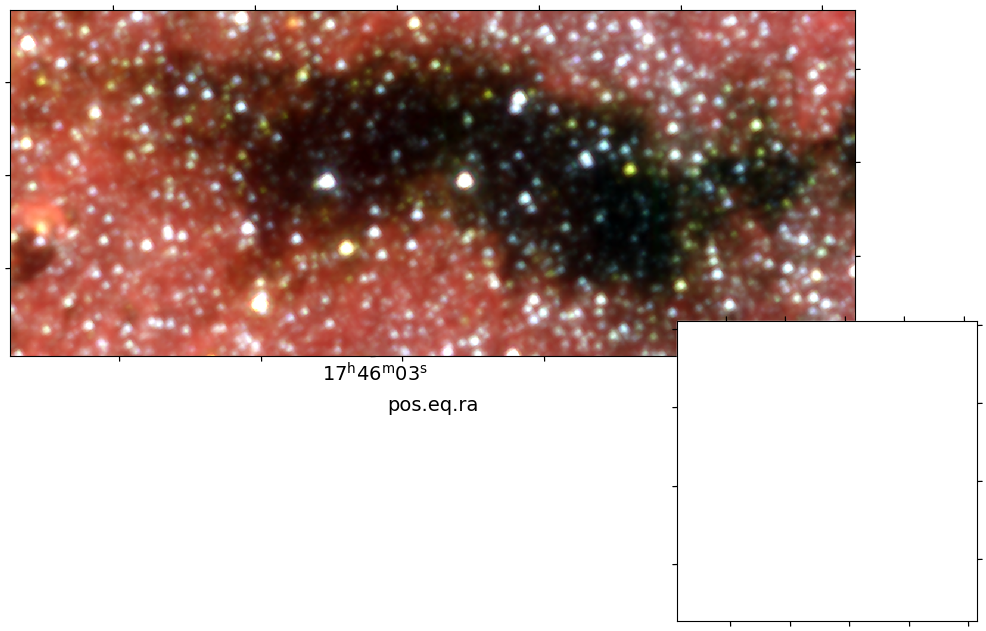

In [22]:
# This part stolen from Adam's private JWST repo: it takes WCS from PNG
import PIL
import pyavm
import numpy as np
from astropy import wcs, units as u
from astropy.io import fits
import requests
from astropy import visualization
from astropy import coordinates

result = requests.get('https://www.dropbox.com/s/umrye8akxk2kmy4/BrickSpitzer_RGB_I321.png?dl=1')
with open('BrickSpitzer_RGB_I321.png', 'wb') as fh:
    fh.write(result.content)
    
rgb_spitzer_scaled = np.array(PIL.Image.open('BrickSpitzer_RGB_I321.png'))[::-1,:,:]
avm = pyavm.AVM.from_image('BrickSpitzer_RGB_I321.png')
ww = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

fig = plt.figure(figsize=(24,10)) # 24,10

ax = plt.subplot(121, projection=ww)
ax.imshow(rgb_spitzer_scaled, origin='lower', interpolation='none')

# Inset zoom
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes

axins = inset_axes(ax, 
                   loc=3, width=3, height=3, 
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                   bbox_to_anchor=(0.4,0.05,1,1),
                   bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 3000,3100
yl,yr = 200,300
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_spitzer_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
# mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
# hide_ticks(axins)

# Labeling stuff
ra = ax.coords['ra']
ra.set_ticks(spacing=0.5 * u.arcmin)
dec = ax.coords['dec']
dec.set_ticks(spacing=0.5 * u.arcmin)

ra.grid(color='w', linewidth = 0.5) # b
dec.grid(color='w', linewidth = 0.5) # r
dec.set_axislabel('Declination')
ra.set_axislabel('Right ascension')

dec.set_ticks_position('b') # bt
dec.set_ticklabel_position('b')
dec.set_axislabel_position('b')
ra.set_ticks_position('l') # lr
ra.set_ticklabel_position('l')
ra.set_axislabel_position('l')